1: The data that we obtained is a sample from the students of classes CS 105, 111, and 141. The data was obtained through a survey sent out to all students of the class, which means that our data analysis must keep in mind the potential biases of the data set. These potential biases could include: only more responsible students answering the survey, only upper division computer science students answering the survey, and only students who go to UCR answering the survey. The data we recieved will be more likely representative of these populations and should be interpreted as such. The data that we recieved included many different questions, however our analysis will primarily be focusing on the students' GPA, most used programming language, majors, and favorite area of tech/CS. 

2: Our goal is to determine whether or not there is a correlation between GPA and when a student learned their favorite language.  To do so we will also be exploring other circumstances surrounding the data, including favorite programming language, major, and favorite area of CS. 

3: In order to learn this information, we will conduct a number of chi squared tests to see if the amount of actual students differs from the amount of selected students. We will factor in degrees of freedom and our significance is 5%. For expected levels, we assume there is an equal distribution between each category/bucket of data. We feel chi squared tests are the best for this because we are testing if certain variables have effects on dependent variables, meaning a chi square test is well suited for this sort of analysis. We will also be providing null hypotheses for each factor that we decide to test. In order to perform our analysis, we must first clean the data, and then we will visualize it using seaborn heatmaps/charts. 

In [ ]:
%pip install seaborn

import pandas as pd

df = pd.read_csv('clean.csv')
df.head()

,Class,class_standing,gender,gpa,major,major_reason,favorite_area,first_language,first_language_grade,most_used_language,most_used_language_reason,loc_per_week,preferred_field,least_favorite_subject
0,CS105,Senior,Male,3.0-3.5,CS,"The topics are interesting, Job market is in h...",Software Development,Python,9-12th grade,Python,Language is helpful with built-in functions,50-100,Hardware/Embedded Systems,Game Development
1,CS105,Junior,Male,3.0-3.5,DS,The topics are interesting,AI/ML,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS105,Senior,Female,3.5-4.0,PSYCH,"The topics are interesting, Advice from family...",Unsure,C++,College,Python,Language is simplified,<50,Artificial Intelligence/Machine Learning,Hardware/Embedded Systems
3,CS105,Junior,Male,3.5-4.0,CS,"The topics are interesting, Job market is in h...",Software Development,C++,9-12th grade,C++,Syntax,<50,Game Development,Artificial Intelligence/Machine Learning
4,CS111,Senior,Male,2.5-3.0,TELE_SYS,"High salary potential, Stable future, I am pas...",Networks,NaN,NaN,NaN,NaN,NaN,NaN,NaN


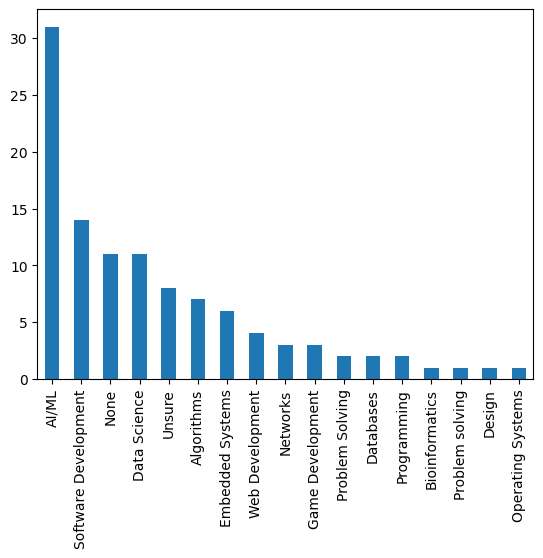

In [2]:
import matplotlib.pyplot as plt

fav_area = df['favorite_area'].value_counts()
fav_area.plot(kind='bar')
plt.show()


<AxesSubplot:>

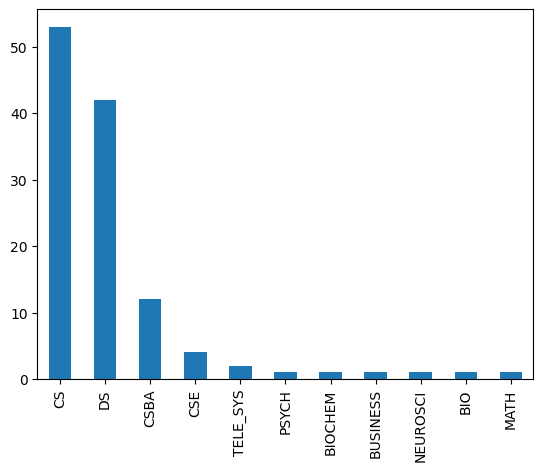

In [3]:
majors = df['major'].value_counts()
majors.plot(kind='bar')

In [4]:
pivot_table = pd.pivot_table(df, values='class_standing', index=['major'], columns=['favorite_area'], aggfunc='count')
pivot_table.head()

favorite_area,AI/ML,Algorithms,Bioinformatics,Data Science,Databases,Design,Embedded Systems,Game Development,Networks,None,Operating Systems,Problem Solving,Problem solving,Programming,Software Development,Unsure,Web Development
major,,,,,,,,,,,,,,,,,
BIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
BIOCHEM,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUSINESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CS,12.0,3.0,NaN,3.0,NaN,1.0,4.0,2.0,2.0,5.0,NaN,1.0,NaN,NaN,8.0,5.0,4.0
CSBA,3.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='favorite_area', ylabel='major'>

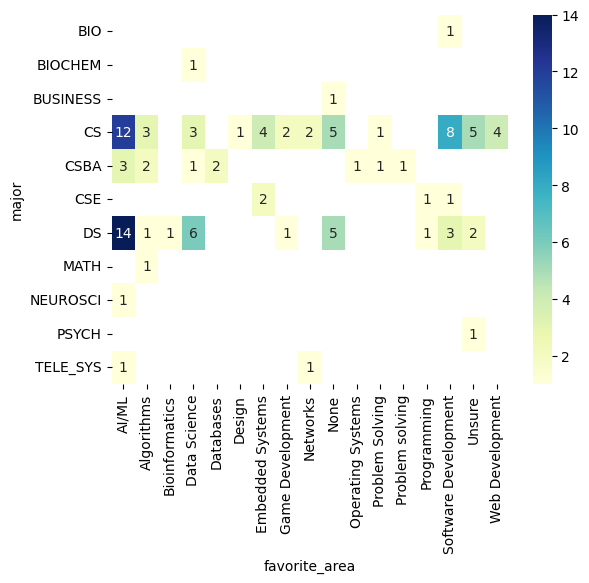

In [5]:
import seaborn as sns

sns.heatmap(pivot_table, cmap='YlGnBu',annot=True, fmt='g')


In [6]:
pivot_table = pd.pivot_table(df, values='class_standing', index=['Class'], columns=['favorite_area'], aggfunc='count')
pivot_table.head()

favorite_area,AI/ML,Algorithms,Bioinformatics,Data Science,Databases,Design,Embedded Systems,Game Development,Networks,None,Operating Systems,Problem Solving,Problem solving,Programming,Software Development,Unsure,Web Development
Class,,,,,,,,,,,,,,,,,
CS105,23.0,5.0,NaN,8.0,2.0,1.0,1.0,3.0,NaN,8.0,NaN,1.0,NaN,1.0,9.0,3.0,4.0
"CS105, CS111",1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
"CS105, CS111, CS141",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"CS105, CS141",NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
CS111,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN


<AxesSubplot:xlabel='favorite_area', ylabel='Class'>

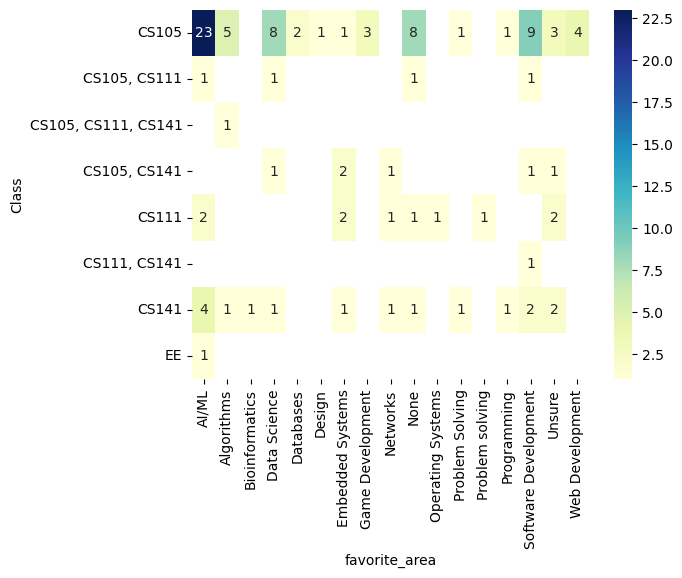

In [7]:
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')

In [8]:
pivot_table = pd.pivot_table(df, values='class_standing', index=[
                             'gender'], columns=['favorite_area'], aggfunc='count')
pivot_table.head()

favorite_area,AI/ML,Algorithms,Bioinformatics,Data Science,Databases,Design,Embedded Systems,Game Development,Networks,None,Operating Systems,Problem Solving,Problem solving,Programming,Software Development,Unsure,Web Development
gender,,,,,,,,,,,,,,,,,
Female,6.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,3.0,1.0,NaN,1.0,1.0,3.0,2.0,1.0
Male,25.0,7.0,NaN,8.0,2.0,1.0,6.0,3.0,1.0,8.0,NaN,2.0,NaN,1.0,11.0,5.0,3.0
Non-Binary,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='favorite_area', ylabel='gender'>

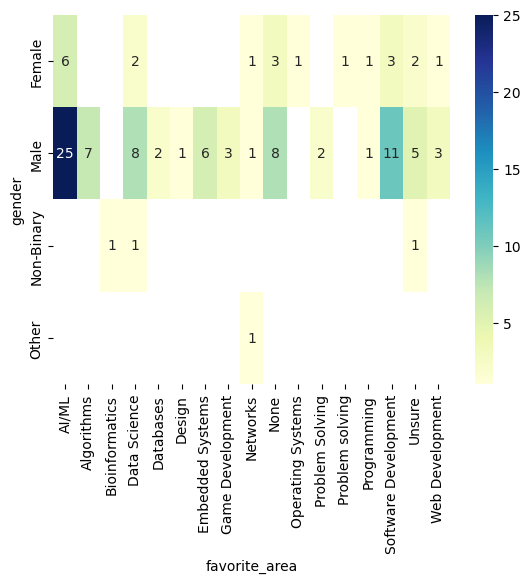

In [9]:
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')

We are hypothesizing that the age that one learns their first programming language at does have a statistically significant impact on one's college GPA. We will use a chi squared test to determine the validity of this statement.

In [10]:
import numpy as np
gpa_startingGrade_tab = pd.crosstab(df['gpa'], df['first_language_grade'])

observed_values = gpa_startingGrade_tab.values # observed data from set
row_sum = observed_values.sum(axis=1) # marginal totals
col_sum = observed_values.sum(axis=0)
total = observed_values.sum()

expected_values = np.outer(row_sum, col_sum) / total # expected: (sum in given row + sum in given column) / total observations

chi_square = ((observed_values - expected_values) ** 2 / expected_values).sum()

dof = (observed_values.shape[0] - 1) * (observed_values.shape[1] - 1) # (number of rows - 1) (number of columns - 1)

print(f"Chi-squared value: {chi_square}")
print(f"degrees of freedom: {dof}" )
gpa_startingGrade_tab

Chi-squared value: 17.769279598934244
degrees of freedom: 9


first_language_grade,1st-5th grade,6-8th grade,9-12th grade,College
gpa,,,,
2.0-2.5,0,1,0,0
2.5-3.0,0,0,5,6
3.0-3.5,1,2,23,23
3.5-4.0,4,9,21,18


Here, the null hypothesis states that starting programming at an early age has no correlation with GPA. The null hypothesis in this case can be rejected as the calculated Chi-squared value of 17.769 exceeds the critical value of 16.919, suggesting some correlation between starting age and college GPA.

We are hypothesizing that the amount of lines of code one writes per week has a statistically significant impact on one's college GPA. We will use a chi squared test to determine the validity of this statement.

In [11]:
gpa_lines_tab = pd.crosstab(df['gpa'], df['loc_per_week'])

observed_values = gpa_lines_tab.values # observed data from set
row_sum = observed_values.sum(axis=1) # marginal totals
col_sum = observed_values.sum(axis=0)
total = observed_values.sum()

expected_values = np.outer(row_sum, col_sum) / total # expected: (sum in given row + sum in given column) / total observations

chi_square = ((observed_values - expected_values) ** 2 / expected_values).sum()

dof = (observed_values.shape[0] - 1) * (observed_values.shape[1] - 1) # (number of rows - 1) (number of columns - 1)

print(f"Chi-squared value: {chi_square}")
print(f"degrees of freedom: {dof}" )
gpa_lines_tab

Chi-squared value: 7.548031005786236
degrees of freedom: 12


loc_per_week,100-200,200-500,50-100,500+,<50
gpa,,,,,
2.0-2.5,0,0,0,0,1
2.5-3.0,1,2,5,0,3
3.0-3.5,9,5,12,2,21
3.5-4.0,8,2,17,3,22


the null hypothesis suggests no correlation between lines of code written weekly and gpa. observation fails to reject null hypothesis, as chi-squared value does not exceed the critical value of 21.026, suggesting a lack of correlation between lines of code written and academic performance.

We hypothesize that one's most used programming language has a statistically significant effect on their college GPA. We will use a chi squared test to determine the validity of this statement.

In [12]:
gpa_language = pd.crosstab(df['gpa'], df['most_used_language'])

observed_values = gpa_language.values # observed data from set
row_sum = observed_values.sum(axis=1) # marginal totals
col_sum = observed_values.sum(axis=0)
total = observed_values.sum()

expected_values = np.outer(row_sum, col_sum) / total # expected: (sum in given row + sum in given column) / total observations

chi_square = ((observed_values - expected_values) ** 2 / expected_values).sum()

dof = (observed_values.shape[0] - 1) * (observed_values.shape[1] - 1) # (number of rows - 1) (number of columns - 1)

print(f"Chi-squared value: {chi_square}")
print(f"degrees of freedom: {dof}" )
gpa_language

Chi-squared value: 12.394374654349434
degrees of freedom: 27


most_used_language,C#,C++,Java,Javascript,Lua,Python,R,Rust,Swift,js
gpa,,,,,,,,,,
2.0-2.5,0,0,0,0,0,1,0,0,0,0
2.5-3.0,0,7,0,0,0,4,0,0,0,0
3.0-3.5,0,29,1,0,0,15,4,0,1,0
3.5-4.0,1,25,0,1,1,19,3,1,0,1


The null hypothesis suggests that there is no correlation between one's most used language and their GPA. With a chi squared value of 12.394, we can accept the null hypothesis, as it is less than the critical value of 40.113. This indicates that there is no statistically significant correlation between one's most used language and their GPA.

We hypothesize that one's most used programming language has a statistically significant impact on one's favorite area of CS. We will use a chi squared test to determine the validity of this statement.

In [13]:
area_fav_language = pd.crosstab(df['favorite_area'], df['most_used_language'])

observed_values = area_fav_language.values # observed data from set
row_sum = observed_values.sum(axis=1) # marginal totals
col_sum = observed_values.sum(axis=0)
total = observed_values.sum()

expected_values = np.outer(row_sum, col_sum) / total # expected: (sum in given row + sum in given column) / total observations

chi_square = ((observed_values - expected_values) ** 2 / expected_values).sum()

dof = (observed_values.shape[0] - 1) * (observed_values.shape[1] - 1) # (number of rows - 1) (number of columns - 1)

print(f"Chi-squared value: {chi_square}")
print(f"degrees of freedom: {dof}" )
area_fav_language

Chi-squared value: 234.5208020050125
degrees of freedom: 144


most_used_language,C#,C++,Java,Javascript,Lua,Python,R,Rust,Swift,js
favorite_area,,,,,,,,,,
AI/ML,0,13,0,0,0,15,2,0,0,0
Algorithms,0,4,0,0,0,3,0,0,0,0
Bioinformatics,0,0,0,0,0,1,0,0,0,0
Data Science,0,4,0,0,0,3,3,0,0,0
Databases,0,2,0,0,0,0,0,0,0,0
Design,0,0,0,0,0,1,0,0,0,0
Embedded Systems,0,3,0,0,0,2,0,1,0,0
Game Development,1,1,1,0,0,0,0,0,0,0
Networks,0,2,0,0,0,0,0,0,0,0


The null hypothesis suggests that there is no correlation between a person's favorite programming language and favorite field in computer science. We can reject the null hypothesis in this case, because our chi-squared value exceeds the critical value of 163.116, indicating a correlation between programming language preference and computer science fields.